Epoch 1/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7529 - val_loss: 0.4475 - val_accuracy: 0.7846
Epoch 2/50
176/176 [==============================] - 0s 768us/step - loss: 0.4436 - accuracy: 0.7916 - val_loss: 0.4407 - val_accuracy: 0.7861
Epoch 3/50
176/176 [==============================] - 0s 742us/step - loss: 0.4292 - accuracy: 0.7973 - val_loss: 0.4396 - val_accuracy: 0.7875
Epoch 4/50
176/176 [==============================] - 0s 739us/step - loss: 0.4257 - accuracy: 0.8021 - val_loss: 0.4378 - val_accuracy: 0.7832
Epoch 5/50
176/176 [==============================] - 0s 735us/step - loss: 0.4224 - accuracy: 0.7986 - val_loss: 0.4379 - val_accuracy: 0.7875
Epoch 6/50
176/176 [==============================] - 0s 739us/step - loss: 0.4203 - accuracy: 0.8025 - val_loss: 0.4363 - val_accuracy: 0.7868
Epoch 7/50
176/176 [==============================] - 0s 738us/step - loss: 0.4207 - accuracy: 0.7988 - val_loss: 0.4377 - val_accuracy: 0

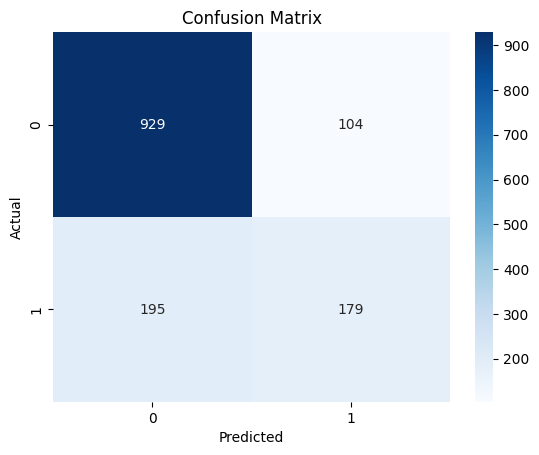

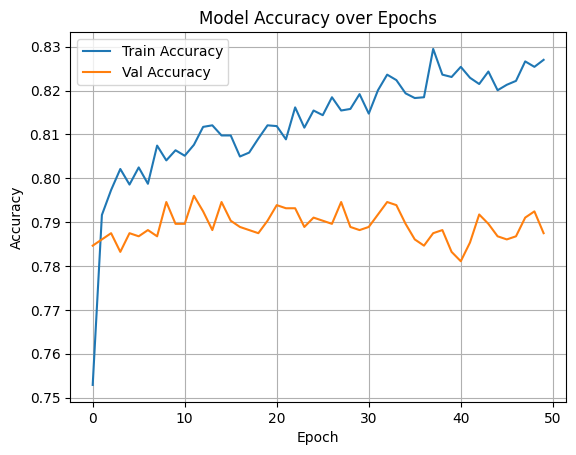

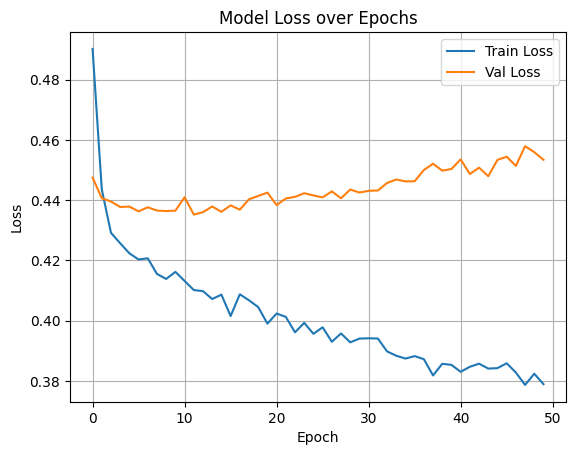

In [4]:
#!python3 -m pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
df = pd.read_csv('/Users/limengfeiyang/CMOR438-final-project/data/telco_churn_clean.csv')


# Preprocessing
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convert categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Build the Neural Network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, verbose=1)


# Evaluation
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


# Prediction & Confusion Matrix
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()
